# **Logistic Regression**

Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class. It is used for classification algorithms its name is logistic regression. It is referred to as regression because it takes the output of the linear regression function as input and uses a sigmoid function to estimate the probability for the given class. The difference between linear regression and logistic regression is that linear regression output is the continuous value that can be anything while logistic regression predicts the probability that an instance belongs to a given class or not.

**Given an employee dataset, our task is to use logistic regression to classify whether an employee is suitable for a promotion or not. Also, evaluate the performance of the model.**

***Sample Data generation***

Create new dataset named 'Employee.csv' with the following attributes:

In [1]:
import numpy as np
import pandas as pd

# Generate random employee data
np.random.seed(123)
n = 1000
age = np.random.normal(40, 10, n)
gender = np.random.choice(['male', 'female'], n)
education = np.random.choice(['high school', 'college', 'graduate'], n)
job_level = np.random.choice(['junior', 'senior'], n)
last_evaluation = np.random.uniform(0.4, 1, n)
average_monthly_hours = np.random.randint(100, 300, n)
time_spend_company = np.random.randint(1, 10, n)
number_of_projects = np.random.randint(1, 7, n)
work_accident = np.random.choice([0, 1], n)
promotion = np.random.choice([0, 1], n)
salary = np.random.choice(['low', 'medium', 'high'], n)


**Convert above data to pandas Dataframe and save it as csv file**

In [2]:
# Create DataFrame
df = pd.DataFrame({
    'age': age,
    'gender': gender,
    'education': education,
    'job_level': job_level,
    'last_evaluation': last_evaluation,
    'average_monthly_hours': average_monthly_hours,
    'time_spend_company': time_spend_company,
    'number_of_projects': number_of_projects,
    'work_accident': work_accident,
    'promotion': promotion,
    'salary': salary
})

# Save DataFrame as CSV file
df.to_csv('Employee.csv', index=False)


Above code will create a dataset with 1000 employees, including information such as age, gender, education, job level, last evaluation, average monthly hours, time spent at the company, number of projects, work accident history, promotion history, and salary. You can adjust the values and parameters as needed to suit your needs.

Now, execute below code to perform **logistic regression**

***Import necessary libraries***

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

**Load the employee data**

In [4]:
data = pd.read_csv('Employee.csv')

**Preview the data**

In [5]:
data.head()

,age,gender,education,job_level,last_evaluation,average_monthly_hours,time_spend_company,number_of_projects,work_accident,promotion,salary
0,29.143694,male,high school,senior,0.612131,244,4,4,1,0,medium
1,49.973454,female,graduate,junior,0.802733,249,3,1,1,0,medium
2,42.829785,male,graduate,senior,0.550151,197,6,2,1,0,high
3,24.937053,female,college,junior,0.486561,147,4,2,0,0,high
4,34.213997,female,college,junior,0.502795,259,4,6,1,1,high


In [6]:
data.shape

(1000, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1000 non-null   float64
 1   gender                 1000 non-null   object 
 2   education              1000 non-null   object 
 3   job_level              1000 non-null   object 
 4   last_evaluation        1000 non-null   float64
 5   average_monthly_hours  1000 non-null   int64  
 6   time_spend_company     1000 non-null   int64  
 7   number_of_projects     1000 non-null   int64  
 8   work_accident          1000 non-null   int64  
 9   promotion              1000 non-null   int64  
 10  salary                 1000 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB


***Data cleaning***

In [8]:
data.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

age                      0
gender                   0
education                0
job_level                0
last_evaluation          0
average_monthly_hours    0
time_spend_company       0
number_of_projects       0
work_accident            0
promotion                0
salary                   0
dtype: int64

**Convert categorical variables to numerical values**

In [9]:
le = LabelEncoder()
data[['gender', 'education', 'job_level', 'salary']] = data[['gender', 'education', 'job_level', 'salary']].apply(le.fit_transform)
# Encode target labels with value between 0 and n_classes-1
print(data.head())


         age  gender  education  job_level  last_evaluation  \
0  29.143694       1          2          1         0.612131   
1  49.973454       0          1          0         0.802733   
2  42.829785       1          1          1         0.550151   
3  24.937053       0          0          0         0.486561   
4  34.213997       0          0          0         0.502795   

   average_monthly_hours  time_spend_company  number_of_projects  \
0                    244                   4                   4   
1                    249                   3                   1   
2                    197                   6                   2   
3                    147                   4                   2   
4                    259                   4                   6   

   work_accident  promotion  salary  
0              1          0       2  
1              1          0       2  
2              1          0       0  
3              0          0       0  
4              1      

***Drop unnecessary features***

In [10]:
data = data.drop(['last_evaluation', 'number_of_projects', 'average_monthly_hours', 'time_spend_company', 'work_accident'], axis=1)
data.head()

,age,gender,education,job_level,promotion,salary
0,29.143694,1,2,1,0,2
1,49.973454,0,1,0,0,2
2,42.829785,1,1,1,0,0
3,24.937053,0,0,0,0,0
4,34.213997,0,0,0,1,0


***Select input and output features***

In [11]:
X = data.drop(['promotion'], axis=1)
y = data['promotion']

***Split data into training and testing set***

In [12]:
# # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (800, 5)
y_train (800,)
X_test (200, 5)
y_test (200,)


***Train the Logistic Regression Model***

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

***Model prediction on test set***

In [14]:
y_pred = model.predict(X_test)

***Evaluate Model Performance using classification report***

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45        99
           1       0.47      0.49      0.48       101

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.47      0.46       200



***Visualize the Model Performance using confusion matrix***

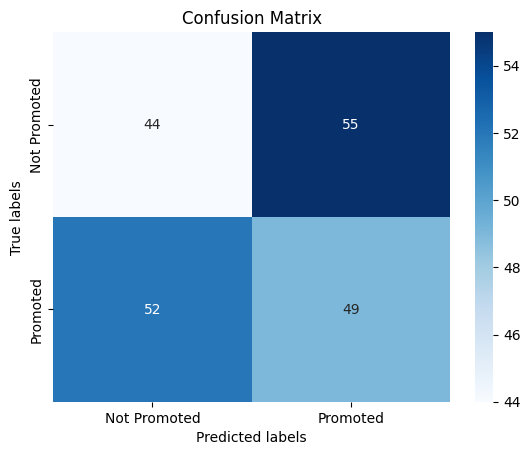

In [16]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
# Add labels, title, and axis ticks
ax.xaxis.set_ticklabels(['Not Promoted', 'Promoted'])
ax.yaxis.set_ticklabels(['Not Promoted', 'Promoted'])

# Show the plot
plt.show()